In [1]:
import myLineComponents as L
import myImageProcessing as I
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

% matplotlib inline

In [2]:
def process_image(lane_img):
    
    lane_dst = cv2.undistort(lane_img, I.mtx, I.dist, None, I.mtx)
    
    # diag2
    lane_thresholded = I.thresholding(lane_dst)
    
    # diag3
    lane_warped = I.warping(lane_thresholded)
    
    # diag4
    lane_slidingwindowed = I.sliding_window_method(lane_warped)
    
    lx,rx,ly,ry,lfx,rfx,lc,rc,lr2,rr2,oc= I.findCurvature(lane_slidingwindowed)
    info = {'lc':lc, 'rc': rc, 'lr2':lr2, 'rr2': rr2, 'oc': oc}
    
    # diag5
    lane_detected = I.drawCurves(lx, rx, ly, ry, lfx, rfx)

    # diag1 
    lane_unwarped = I.unwarping(lane_dst, lane_slidingwindowed)

    # assemble diagnostic screens
    diagScreen = I.createDiagScreen(lane_unwarped, lane_thresholded, 
                                 lane_warped, lane_slidingwindowed*255,
                                  lane_detected, info)
    return diagScreen

In [21]:
lane_images = glob.glob('./project_video_frames/*.jpeg')

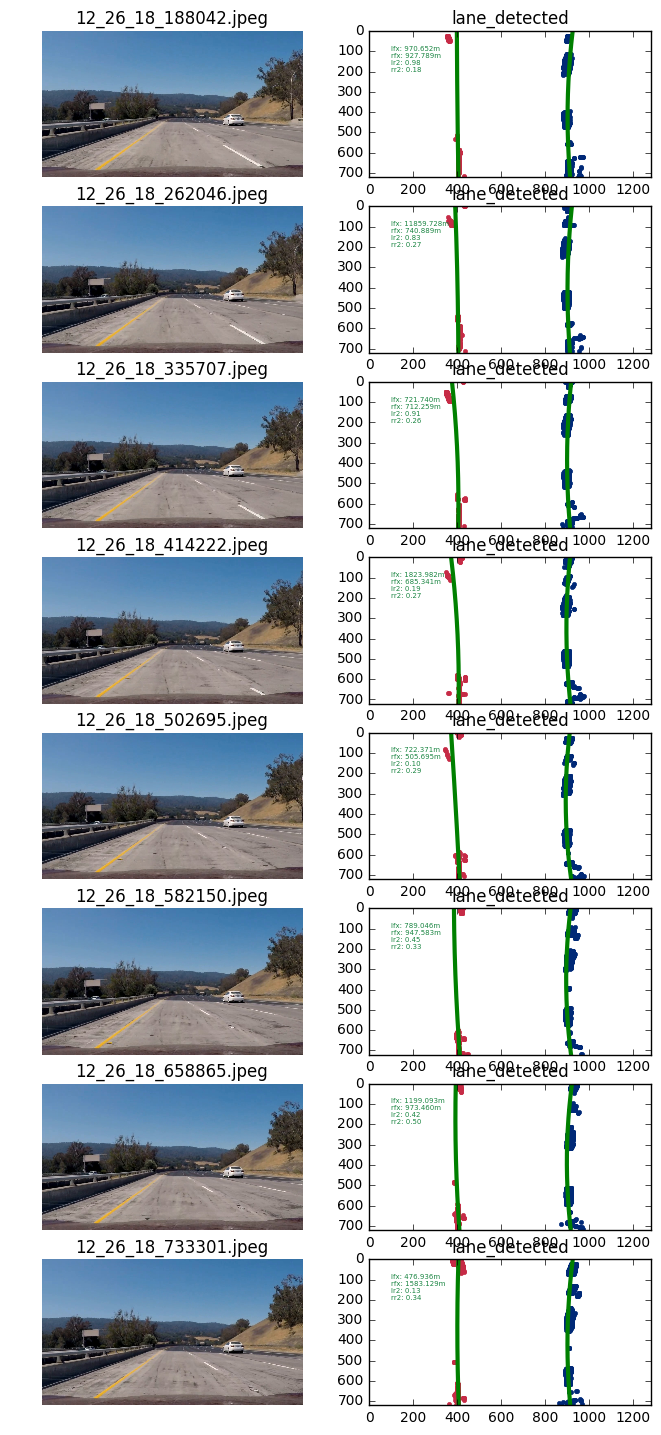

In [10]:
fig = plt.figure()
fig.set_figwidth(8); fig.set_figheight(20)

for n, i in enumerate(lane_images[585:593]): 
    ax = fig.add_subplot(9,2,2*n+1, title=i[-20:])
    ax.axis('off')
    lane_img = mpimg.imread(i)
    ax = plt.imshow(lane_img)
    
    ax = fig.add_subplot(9,2,2*n+2, title='lane_detected')
    y_arr = np.linspace(0,I.h,num=I.h+1)
    lx,rx,ly,ry,lfx,rfx,lc,rc,lr2,rr2 = process_image(lane_img)
    
    ax.plot(lx, ly, '.', color='#C62B46')
    ax.plot(rx, ry, '.', color='#002977')
    ax.set_xlim(0,I.w)
    ax.set_ylim(0,I.h)
    ax.plot(lfx, y_arr, color='green', linewidth=3)
    ax.plot(rfx, y_arr, color='green', linewidth=3)
    ax.text(100, 200, 'lfx: {:.3f}m\nrfx: {:.3f}m\nlr2: {:.2f}\nrr2: {:.2f}'.format(lc,rc,lr2,rr2),
        color='#188440', fontsize=5)
    
    fig.gca().invert_yaxis()

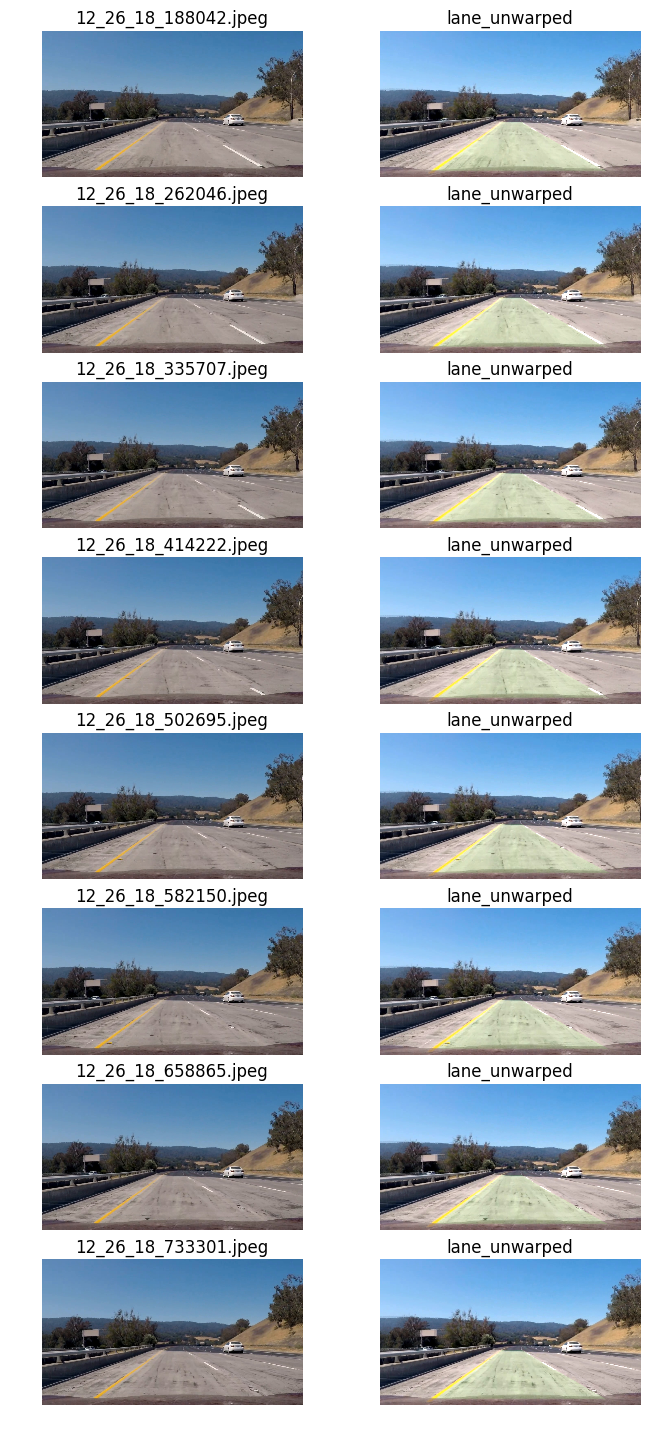

In [18]:
fig = plt.figure()
fig.set_figwidth(8); fig.set_figheight(20)

for n, i in enumerate(lane_images[585:593]): 
    ax = fig.add_subplot(9,2,2*n+1, title=i[-20:])
    ax.axis('off')
    lane_img = mpimg.imread(i)
    ax = plt.imshow(lane_img)
    
    ax = fig.add_subplot(9,2,2*n+2, title='lane_unwarped')
    ax.axis('off')
    y_arr = np.linspace(0,I.h,num=I.h+1)
    lane_unwarped = process_image(lane_img)
    result = cv2.addWeighted(lane_img,1,lane_unwarped,0.3,0)
    
    plt.imshow(result)

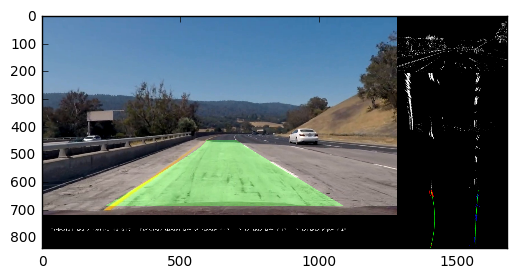

In [25]:
plt.imshow(process_image(mpimg.imread(lane_images[594])))

In [28]:
mpimg.imsave('pipeline_full.png', process_image(mpimg.imread(lane_images[594])))

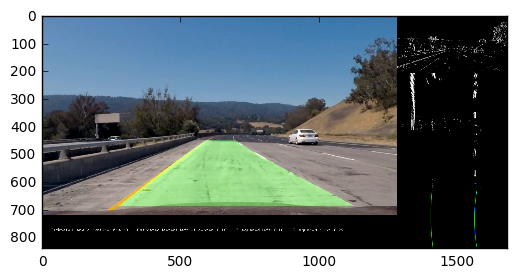

In [8]:
plt.imshow(process_image(mpimg.imread(lane_images[589])))

27.495900799
4.0657964493
30.6259225432
2.86926939526


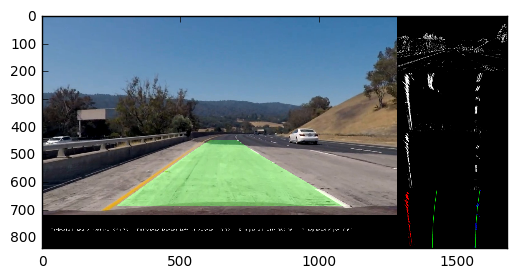

In [18]:
plt.imshow(process_image(mpimg.imread(lane_images[599])))

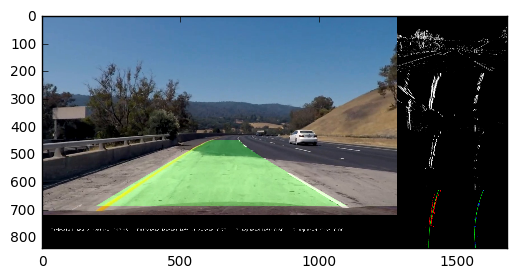

In [28]:
plt.imshow(process_image(mpimg.imread(lane_images[609])))

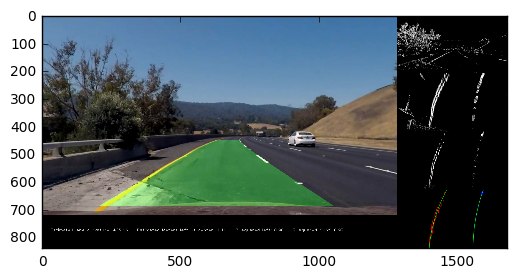

In [38]:
plt.imshow(process_image(mpimg.imread(lane_images[619])))

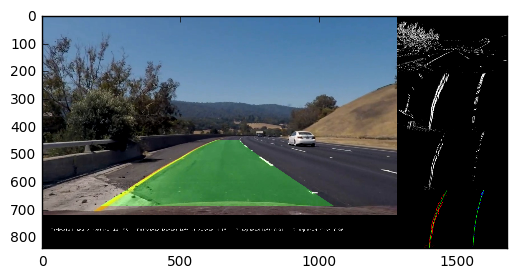

In [39]:
plt.imshow(process_image(mpimg.imread(lane_images[620])))

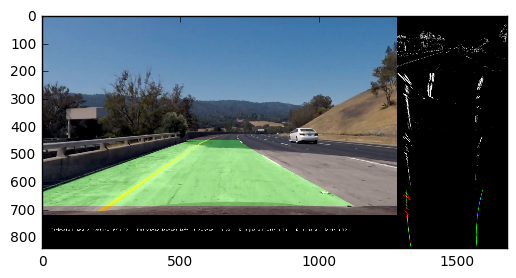

In [23]:
plt.imshow(process_image(mpimg.imread(lane_images[604])))

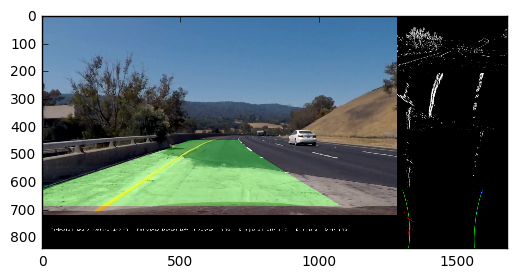

In [32]:
plt.imshow(process_image(mpimg.imread(lane_images[613])))

In [40]:
# This cell was run last after all the necessary fixes made to the original processing methods. 

lane_images = glob.glob('./project_video_frames/*.jpeg')

if not os.path.exists('./diag/'):
    os.makedirs('./diag/')

for s in lane_images:   
    result = process_image(mpimg.imread(s))
    mpimg.imsave('./diag/'+s[-20:], result)
    print(s)

./project_video_frames/12_25_32_317625.jpeg
./project_video_frames/12_25_32_446744.jpeg
./project_video_frames/12_25_32_532314.jpeg
./project_video_frames/12_25_32_616885.jpeg
0.702964127266
1.41352993254
0.541831581543
3.00941892048
./project_video_frames/12_25_32_693696.jpeg
0.608423768287
3.71674013321
0.474720107369
4.87839994827
./project_video_frames/12_25_32_772651.jpeg
1.76205057857
9.40846072166
1.32034341313
10.6839459729
./project_video_frames/12_25_32_846088.jpeg
2.22583045315
10.1200594665
2.03283046416
9.7941361843
./project_video_frames/12_25_32_923529.jpeg
0.573414239783
10.578997568
0.39672670273
10.3866141611
./project_video_frames/12_25_32_998235.jpeg
0.636796865349
8.64936067276
0.443867336791
8.13483127664
./project_video_frames/12_25_33_070695.jpeg
0.860531901206
12.2342878066
0.767125763089
12.053103831
./project_video_frames/12_25_33_147558.jpeg
0.481236396381
12.1803266212
0.301442253803
12.0010296675
./project_video_frames/12_25_33_224055.jpeg
./project_video_

In [4]:
# This cell was run last after all the necessary fixes made to the original processing methods. 

lane_images = glob.glob('./challenge_video_frames/*.jpeg')

if not os.path.exists('./diag_challenge/'):
    os.makedirs('./diag_challenge/')

for s in lane_images[3:]: 
    result = process_image(mpimg.imread(s))
    mpimg.imsave('./diag_challenge/'+s[-20:], result)

27.6003050978
54.4722227323
29.3840065763
48.8272828368
79.1792831513
1200.87475575
59.1736816816
1256.66536119
651.248166647
11.8031264138
654.793080175
7.71988221222
1342.79414461
48.1696337706
1270.50136239
38.8583340053
1737.20848804
23.47900804
1627.91488774
14.826617559
4528.00577974
4.09153886764
4542.38651223
3.76493228363
4566.48616678
46.953744272
4554.34822855
36.4758341648
33705.4847157
25.3334471574
33694.735679
16.3652580127
36.7832109749
61.710907481
33.0709347028
77.6551420239


TypeError: expected non-empty vector for x

In [5]:
x

12